In [7]:
#downloading dataset, importing libraries

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys

import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

In [8]:
#reading the dataset, deleting missing value entries
df = pd.read_csv('Cambridge Crime Data.csv')
#printing first 5 rows
df.head()



,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"


In [9]:
#printing columns list
df.columns

Index(['File Number', 'Date of Report', 'Crime Date Time', 'Crime',
       'Reporting Area', 'Neighborhood', 'Location'],
      dtype='object')

In [10]:
# Encoding, using ONE HOT ENCODER 
enc = OneHotEncoder()

df_onehot = pd.get_dummies(df[['Crime', 'Neighborhood']])

#df = enc.fit_transform(df[['Crime', 'Neighborhood']])
df_onehot['Reporting Area'] = df['Reporting Area']



In [11]:
display(df)

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"
...,...,...,...,...,...,...,...
56009,2016-07187,09/30/2016 04:05:00 PM,09/28/2016 17:00 - 18:00,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA"
56010,2016-07189,09/30/2016 05:38:00 PM,09/30/2016 16:30 - 17:38,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA"
56011,2016-07192,09/30/2016 06:52:00 PM,09/16/2016 18:52 - 09/30/2016 18:52,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA"
56012,2016-07194,09/30/2016 07:52:00 PM,09/30/2016 19:51,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA"


In [12]:
df_onehot.columns

Index(['Crime_Accident', 'Crime_Admin Error', 'Crime_Aggravated Assault',
       'Crime_Annoying & Accosting', 'Crime_Arson', 'Crime_Auto Theft',
       'Crime_Commercial Break', 'Crime_Commercial Robbery',
       'Crime_Counterfeiting', 'Crime_Disorderly', 'Crime_Domestic Dispute',
       'Crime_Drinking in Public', 'Crime_Drugs', 'Crime_Embezzlement',
       'Crime_Extortion/Blackmail', 'Crime_Flim Flam', 'Crime_Forgery',
       'Crime_Gambling', 'Crime_Harassment', 'Crime_Hit and Run',
       'Crime_Homicide', 'Crime_Housebreak', 'Crime_Indecent Exposure',
       'Crime_Kidnapping', 'Crime_Larceny (Misc)',
       'Crime_Larceny from Building', 'Crime_Larceny from MV',
       'Crime_Larceny from Person', 'Crime_Larceny from Residence',
       'Crime_Larceny of Bicycle', 'Crime_Larceny of Plate',
       'Crime_Larceny of Services', 'Crime_Liquor Possession/Sale',
       'Crime_Mal. Dest. Property', 'Crime_Missing Person',
       'Crime_Noise Complaint', 'Crime_OUI', 'Crime_Peeping & S

In [13]:
# dropping null values 
df_onehot.dropna(inplace=True) 

In [14]:
# defining x
x_columns = 68

#no selected features as one hot encoding being used.
x = df_onehot.iloc[:, 0:x_columns].values

In [15]:
#implementing Elbow method in Python
crimeelbow = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df_onehot)
    crimeelbow.append(kmeanModel.inertia_)

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

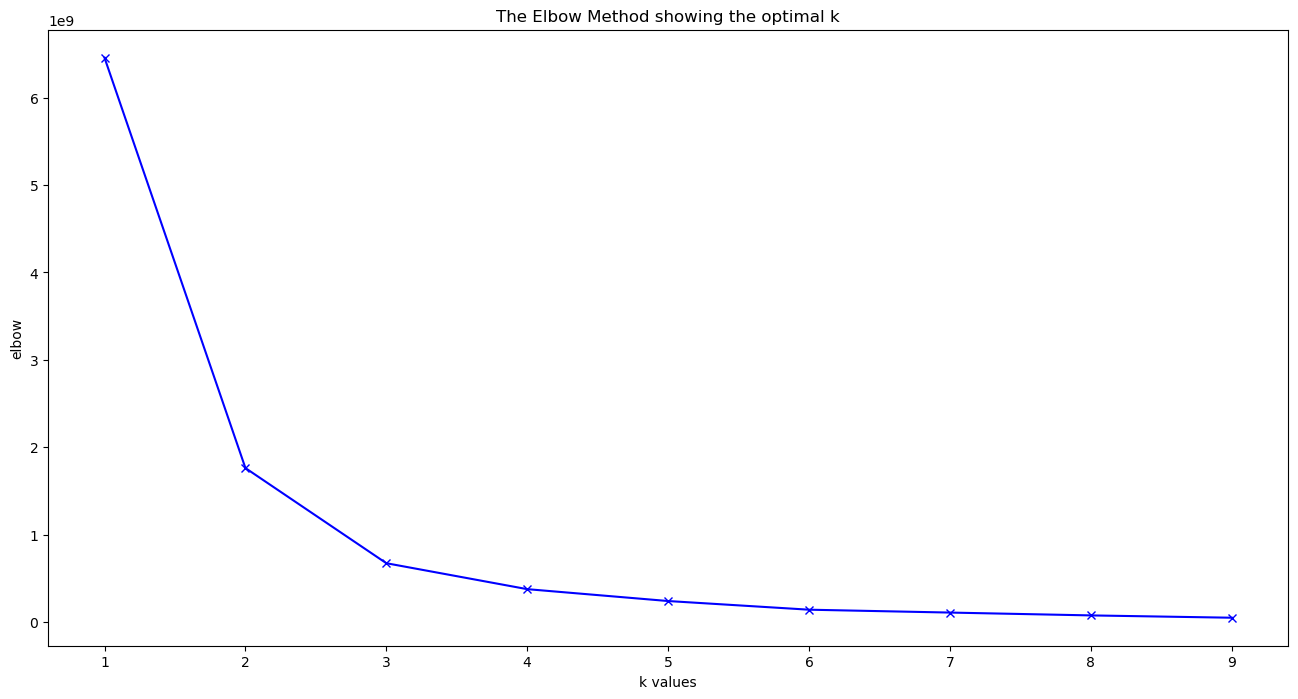

In [16]:
#plotting Elbow method vs values of K
plt.figure(figsize = (16,8))
plt.plot(K, crimeelbow, 'bx-')
plt.xlabel('k values')
plt.ylabel ('elbow')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
#observation:

print("As per elbow method graph above, the curve is taking bend when clusters are 2")

As per elbow method graph above, the curve is taking bend when clusters are 2


In [18]:
#defining a KMEANS model with 2 clusters
model = KMeans(n_clusters =2, random_state = 0)
model.fit(x)  

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [19]:
#scaling and preprocessing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)


In [20]:
#defining clusters for model
clusters = model.predict(x)

In [21]:
#printing model inertia
model.inertia_

1760935557.5823102

In [22]:
# trying a different optimal value of k, i.e k = 3
model1 = KMeans(n_clusters =3, random_state = 0)
model1.fit(x)  

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [23]:
#printing model1 inertia
model1.inertia_

671883248.4263504

In [24]:
# printing first 10 data samples for model
y = model.fit_predict(x)
print(y[0:10])

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 0 1 0 1 0 1 0 1]


In [25]:
# printing first 10 data samples for model1
y1 = model1.fit_predict(x)
print(y1[0:10])

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 2 0 0 1 0 1 0]


In [26]:
#defining centres for model
centres = model.cluster_centers_
print(centres)

[[ 1.19072753e-02  1.18228265e-02  2.66013596e-02  1.47785331e-03
   1.14005827e-03  1.84520542e-02  1.37229236e-02  3.96909175e-03
   2.11121902e-03  4.89802812e-03  6.64189503e-02  1.98454588e-03
   8.48710045e-03  2.40678968e-03  6.75590086e-04  1.90854199e-02
   4.91069544e-02  1.06658389e-17  1.42718406e-02  9.47092851e-02
   3.37795043e-04  4.72068572e-02  3.63129671e-03  5.91141325e-04
   5.15137440e-03  5.41738800e-02  9.87206013e-02  4.86847106e-02
   3.17527340e-02  4.83046911e-02  4.18021366e-03  3.92686737e-03
   1.05560951e-03  6.64611747e-02  1.85365030e-02  5.06692564e-04
   6.16475953e-03  8.02263227e-04  9.54270996e-03  2.53346282e-04
   2.49123844e-03  5.06692564e-04  4.68268378e-02  5.29915973e-02
   3.37795043e-04  1.16539290e-02  6.50255458e-03  2.19566778e-03
   2.76147448e-02  5.48916945e-03  1.56230207e-03  4.81357936e-03
   3.23860997e-02  1.39340455e-03  6.41810581e-02 -1.37390099e-14
   3.41393580e-14  3.34732242e-14  5.07959296e-02  1.42524881e-14
  -2.21003

In [27]:
df_onehot

,Crime_Accident,Crime_Admin Error,Crime_Aggravated Assault,Crime_Annoying & Accosting,Crime_Arson,Crime_Auto Theft,Crime_Commercial Break,Crime_Commercial Robbery,Crime_Counterfeiting,Crime_Disorderly,...,Neighborhood_Highlands,Neighborhood_Inman/Harrington,Neighborhood_MIT,Neighborhood_Mid-Cambridge,Neighborhood_North Cambridge,Neighborhood_Peabody,Neighborhood_Riverside,Neighborhood_Strawberry Hill,Neighborhood_West Cambridge,Reporting Area
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,504.0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,610.0
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,708.0
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,105.0
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,708.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,510.0
56010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1105.0
56011,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,702.0
56012,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,1002.0


In [28]:
df_onehot = df_onehot.drop(df_onehot.columns[[0]],axis = 1)

Text(0, 0.5, 'Reporting Area')

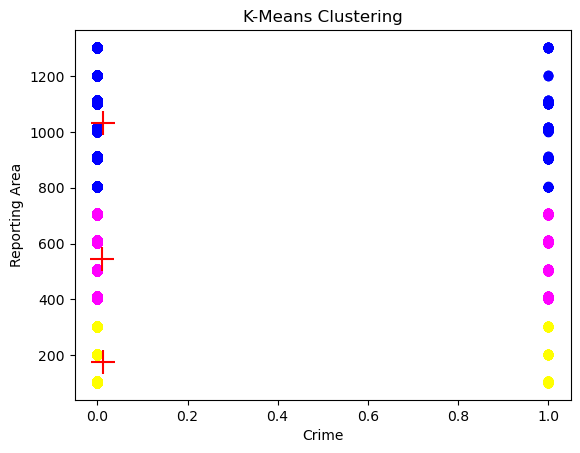

In [34]:
#plotting KMeans cluster between Crime and Reporting Area columns
import matplotlib.pyplot as plt
colors = ['magenta', 'blue', 'yellow']
for i in range(3):
    plt.scatter(x[y1 == i, 1], x[y1 == i, 67], c=colors[i])
plt.scatter(model1.cluster_centers_[:, 1], model1.cluster_centers_[:, 67], color='red', marker='+', s=300)
plt.title('K-Means Clustering')
plt.xlabel('Crime')
plt.ylabel('Reporting Area')

MemoryError: Unable to allocate 11.7 GiB for an array with shape (1568644066,) and data type float64

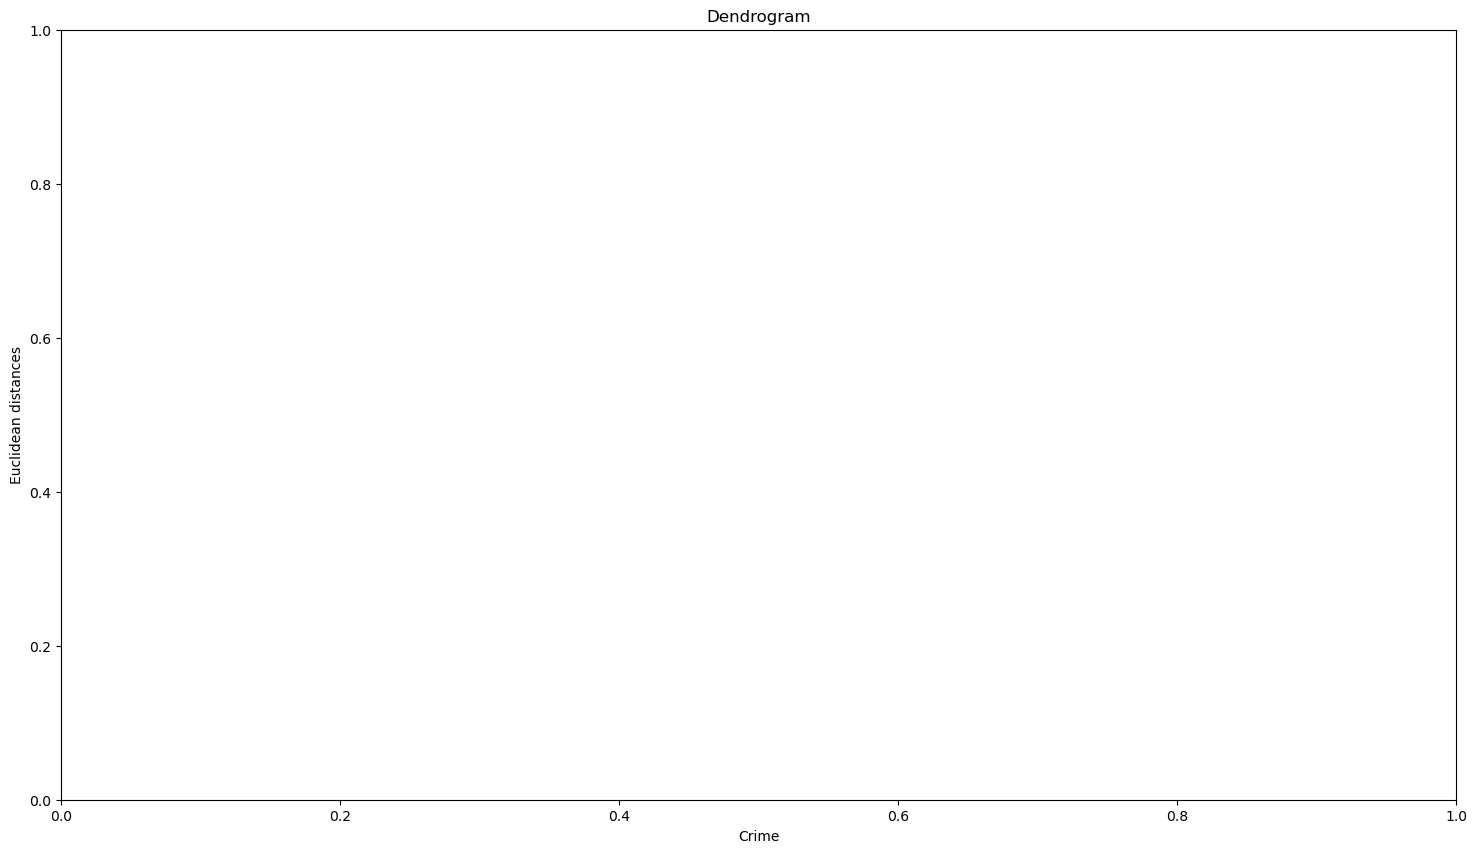

In [33]:
#HIERARCHICAL clustering part of Agglomerative clustering:

# down loading Scipy library


# generating Agglomerative Clustering, (i.e. a Dendogram)


#SciPy Dendogram (structuring
plt.figure(figsize=(18,10))
plt.title('Dendrogram')
plt.xlabel('Crime')
plt.ylabel('Euclidean distances')
dendrogram = sch.dendrogram(sch.linkage(x, method ='ward'),
                            color_threshold=200, 
                            above_threshold_color='red') 
plt.show()



In [31]:
# SciKitLearn HIERARCHICAL clustering part of Agglomerative clustering -WITH 3 clusters
modelHC = AgglomerativeClustering(n_clusters = 3, affinity ='euclidean',
                                 linkage ='ward')
yHC = modelHC.fit_predict(df_onehot)

plt.scatter(x[:, 1], x[:, 67], c=yHC, cmap="rainbow")
plt.xlabel('Crime Accident')
plt.ylabel('Reporting area')
plt.title("SciKitLearn Agglomerative Clustering")
plt.show()

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


MemoryError: Unable to allocate 11.7 GiB for an array with shape (1568644066,) and data type float64

In [32]:
#MEMORY ERRORS

print("HIERARCHICAL CLUSTERING IS GIVING MEMORY ERRORS ABOVE, DUE TO NATURE OF THE DATASET")

HIERARCHICAL CLUSTERING IS GIVING MEMORY ERRORS ABOVE, DUE TO NATURE OF THE DATASET
